# 회귀

## 회귀 소개  
회귀(regression)는 현태 통계학을 떠받치고 있는 주요 기둥 중 하나다.  
회귀 예측의 핵심 : 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수**를 찾아내는 것  
<br>
지도학습은 두 가지로 나뉘는데, 바로 **분류(이산형)**와 **회귀(연속형)**다.  
여러 가지 회귀 중에서 선형 회귀가 가장 많이 사용된다.  
선형 회귀 : 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식.  
 - 일반 성형 회귀 : 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델  
 - 릿지(Ridge) 회귀 : 선형 회귀에 L2 규제를 추가한 회귀 모델. L2 규제를 적용하는데, L2 규제는 상대적으로 큰 회귀 계수 값의  
 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델.  
 - 라쏘(Lasso) 회귀 : 선형 회귀에 L1 규제(=피처 선택 기능)를 적용한 방식. L1규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어  
 회귀 예측 시 피처가 선택되지 않게 하는 것.  
 - 엘라스틱넷(Elasticnet) : L2, L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를  
 줄임과 동시에 L2 규제로 계수 값의 크기를 조정.  
 - 로지스틱 회귀(Logistic Regression) : 분류에 사용되는 선형 모델. 매우 강력한 분류 알고리즘. 회소 영역의 분류, 예를 들어  
 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임.

## 단순 선형 회귀를 통한 회귀 이해  
**단순 선형 회귀**  
- 특징   
 1) 독립변수 1개, 종속 변수 1개  
 2) 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류  
<br>   
    
- 목표 : 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델을 만들기  
<br>  

- 오류 합 계산 방법    
 1) 오류 합을 계산할 때 절댓값 취하기
 2) 오류 값의 제곱을 구해서 더하는 방식(RSS, Residual sum of Square) <- 미분 등의 계산 편리  
<br>  

회귀에서 RRS는 비용(Cost)이며 w 변수(회귀 계수)로 구성되는 RSS를 비용 함수라고 한다.  
회귀 알고리즘은 데이터를 계속 학습하면서 오류 값을 지속해서 감소시키고 최종적으로 최소의 오류 값을 구한느 것이다.  
비용 함수를 손실함수(loss function)이라고 한다.

## 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

**경사 하강법**  
- 특징 : 고차원 방정식에 대한 문제 해결, 비용함수 RSS를 최소화하는 방법을 직관적으로 제공  
<br>  

수식과 절차를 이용해 경사 하강법을 파이썬 코드로 구현해 보겠다.

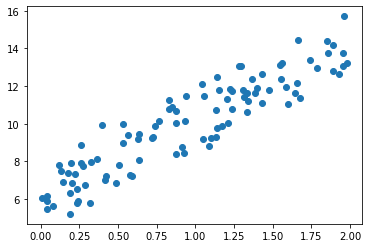

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사 (w1 = 4, w0 = 6). 임의의 값은 노이즈를 위해 만듦.
X = 2 *np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

다음으로 비용 함수를 정의해 보겠다.

In [5]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

이제 경사 하강법을 Gradient_descent()라는 함수를 생성해 보겠다.

In [8]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

다음은 get_weight_updates()을 경사 하강 방식으로 반복적으로 수행하여 w1과 w0를 업데이트하는 함수인 gradient_descent_steps() 함수를 생성하겠다.

In [9]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0, w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

이제 gradient_descent_steps()를 호출해 w1과 w0을 구해 보겠다.  
그리고 최종적으로 예측값과 실제값의 RSS 차이를 계산하는 get_cost() 함수를 생성하여 경사 하강법의 예측 오류도 계산하겠다.

In [15]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0 : {1:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0 : 6.162
Gradient Descent Total Cost : 0.9935


앞에서 구한 y_pred에 기반해 회귀선을 그려 보겠다.

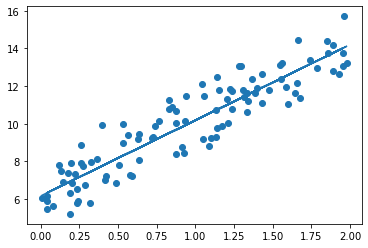

In [16]:
plt.scatter(X,y)
plt.plot(X, y_pred)

경사 하강법을 이용해 회귀선이 잘 만들어졌음을 알 수 있다.  
일반적으로 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 **수행 시간이 오래 걸린다.**  
이 때문에 실전에서 대부분 **확률적 경사 하강법**을 이용한다.  
학률적 경사 하강법 : 일부 데이터만 이용해 W가 업데이트되는 값을 계산하므로 빠른 속도 보장.  
<br>   

(미니 배치)확률적 경사 하강법을 구현해 보겠다.

In [38]:
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    inter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1,w0,sample_X, sample_y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

이렇게 만들어진 stochastic_gradient_descent_Steps()를 이용해 w1, w0 및 예측 오류 비용을 계산해 보겠다.

In [39]:
w1, w0 = stochastic_gradient_descent_steps(X, y,iters=1000)
print('w1 :', round(w1[0,0], 3), "w0 : ", round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Total Cost{0:.4f}'.format(get_cost( y, y_pred)))

w1 : 4.028 w0 :  6.156
Stochastic Gradient Total Cost0.9937


(미니 배치) 확률적 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 w1, w0와 큰 차이가 없으며,  
예측 오류 비용 또한 0.9937로 경사 하강법으로 구한 예측 오류 비용 0.9935보다 아주 조금 높을 뿐 큰 차이는 없다.  
따라서, 큰 데이터를 처리할 경우 좀 더 빠른 확률적 경사 하강법을 이용한다.

## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측  
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model 에서 사이킷런이 지원하는 다양한 선형 모듈 확인 가능.  
<br>  
 
### LinearRegression 클래스 - Ordinary Least Squares  
**LinearRegression 클래스** : 예측값과 실제 값의 RSS(Residual sum of square)를 최소화해 OLS(Ordinary Least Square) 추정 방식으로 구현할 클래스.  
<br>  

Ordinary Least Squares 기반의 회귀 계수 계산은 입력  피처의 독립성에 많은 영향을 받는다.  
피처 간의 상관관게가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해진다.   - > 다중 공선성 문제  


### 회귀 평가 지표  
회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심이다.  
<br>
실제값과 예측값의 차이를 그냥 더하면 +와 -가 섞여서 오류가 상쇄된다. 이 때문에 오류의 절댓값 평균이나 제곱, 또는 제곱한 뒤   
다시 루트를 씌운 평균값을 구한다.

### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현  
이제 LinearRegression 클래스를 이용해 선형 회귀 모델을 만들어 보겠다. 

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrame 반환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DateFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- CRIM : 지역별 범죄 발생율  
- ZN : 25,00평방피트를 초과하는 거주 지역의 비율  
- INDUS : 비상업 지역 넓이 비율  
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)  
- NOX : 일산화질소 농도  
- RN : 거주할 수 있는 방 개수  
- AGE : 1940년 이전에 건축된 소유 주택의 비율  
- DIS : 5개 주요 고용센터까지의 가중 거리  
- RAD : 고속도로 접근 용이도  
- TAX : 10,000달러당 재산세율  
- PTRATIO : 지역의 교사와 학생 수 비율  
- B : 지역의 흑인 거주 비율  
- LSTAT : 하위 계층의 비율  
- MEDV : 본인 소유의 주택 가격(중앙값)

다음으로 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화해서 알아보겠다.  

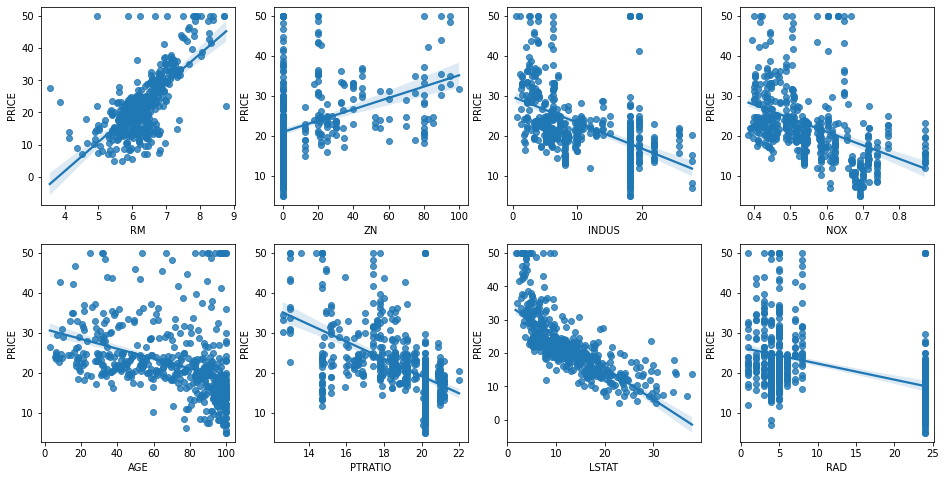

In [63]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS', 'NOX','AGE', 'PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타난다.  

이제 LinearRegression 클래스를 이요해 보스턴 주택 가격의 회귀 모델을 만들겠다.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [66]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수값 : ', np.round(lr.coef_, 1))

절편 값 :  40.995595172164336
회귀 계수값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


coef_ 속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수값으로 다시 매핑하고, 높은 값 순으로 출력해 보겠다.

In [67]:
# 회귀 계수를 쿤 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼러명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

이번엔 5개의 폴드 세트에서 cross_val_score()을 이용해 교차 검증으로 MSE와 RMSE를 측정해 보겠다.

In [71]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score() 로 5 폴드 세트로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829
